In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from functools import partial
from scipy.integrate import solve_ivp

In [16]:
def grad(t, xy, p, b, h, ϵ, d):
    x, y = xy[:p], xy[p:]
    x[x<=0] = 0
    dx = b * x - x * (h * y).sum()
    dy = ϵ * h * y * x.sum() - d * y
    return np.concatenate((dx, dy))

In [17]:
def solve(xy0, tmax, p, b, h, ϵ, d):
    t = np.linspace(0, tmax, tmax*10)    
    _grad = partial(grad, p=p, b=b, h=h, ϵ=ϵ, d=d)
    sol = solve_ivp(_grad, (t.min(), t.max()), xy0, t_eval=t, method='BDF')
    t, x, y = sol.t, sol.y[:p,:], sol.y[p:,:]
    x[x<=1] = 0
    return t, x, y

In [18]:
b = 1
h = np.array([0.005, 0.005])
ϵ = np.array([0.8, 0.8])
d = np.array([0.6, 0.6])
xy = np.array([50, 100, 10])
t, x, y = solve(xy, 100, 1, b, h, ϵ, d)

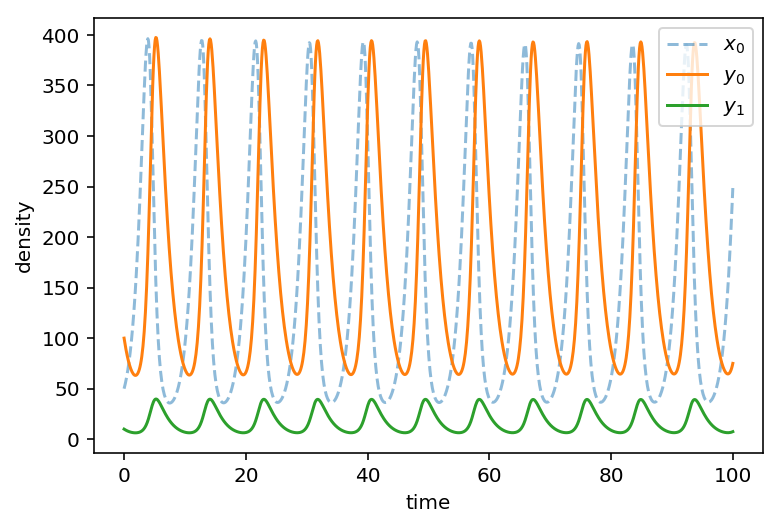

In [19]:
def plot(t, x, y):
    for i, xi in enumerate(x):
        plt.plot(t, xi, label='$x_{}$'.format(i), alpha=0.5, ls='--')
    for i, yi in enumerate(y):
        plt.plot(t, yi, label='$y_{}$'.format(i), ls='-')
    plt.xlabel('time')
    plt.ylabel('density')
    plt.legend()
    ß
plot(t, x, y);

In [32]:
b = 1
h = 0.05*10
ϵ = 0.8
d = 0.6
xy0 = np.array([50, 10, 0])
tinv = 100
t, x, y = solve(xy0, tinv, 1, b, h, ϵ, d)

h = np.array([h, h*1])
xy0 = np.array([x[0,-1], y[0,-1]-1, 1])
t_, x_, y_ = solve(xy0, 500, 1, b, h, ϵ, d)
t_ += tinv
t = np.concatenate((t, t_))
x = np.concatenate((x, x_), axis=1)
y = np.concatenate((y, y_), axis=1)

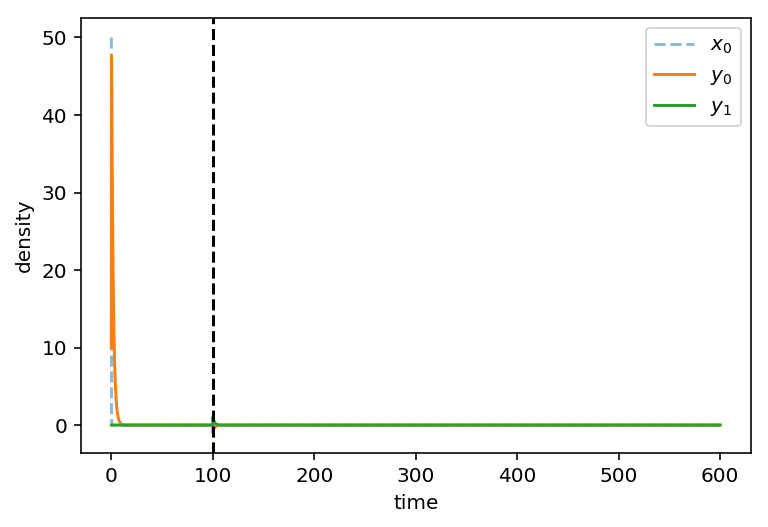

In [33]:
plot(t, x, y)
plt.axvline(tinv, ls='--', color='k')
# plt.ylim(0, 10);

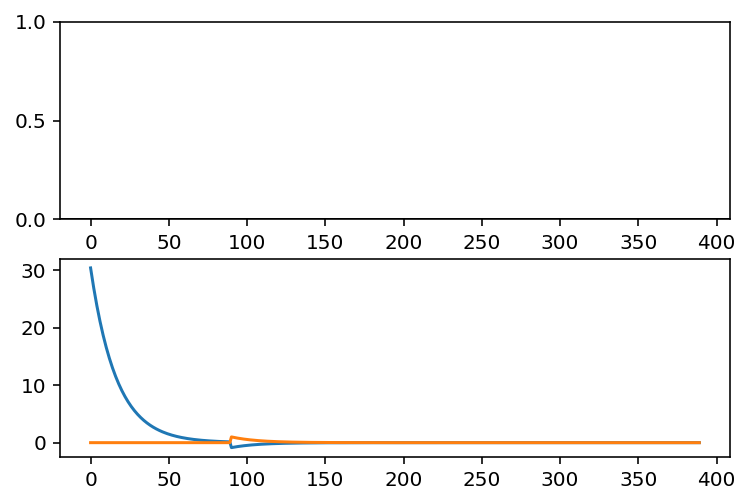

In [30]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(x[0, tinv:400])
axes[0].set_ylim(-0.00001, 1)
axes[0].axhline(0, color='k', lw=1)
axes[1].plot(y[:, tinv:400].T);